In [14]:
import numpy as np
import pandas as pd
import util_stat, util_plot
import matplotlib.pyplot as plt
import random

In [5]:
def ReadBrfss(filename='data/CDBRFS08.ASC.gz', compression='gzip', nrows=None):
    """Reads the BRFSS data.
    filename: string
    compression: string
    nrows: int number of rows to read, or None for all
    returns: DataFrame
    """
    var_info = [
        ('age', 101, 102, int),
        ('sex', 143, 143, int),
        ('wtyrago', 127, 130, int),
        ('finalwt', 799, 808, int),
        ('wtkg2', 1254, 1258, int),
        ('htm3', 1251, 1253, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pd.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = util_stat.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, compression=compression, nrows=nrows)
    CleanBrfssFrame(df)
    return df

def CleanBrfssFrame(df):
    """Recodes BRFSS variables.
    df: DataFrame
    """
    # clean age
    df.age.replace([7, 9], float('NaN'), inplace=True)

    # clean height
    df.htm3.replace([999], float('NaN'), inplace=True)

    # clean weight
    df.wtkg2.replace([99999], float('NaN'), inplace=True)
    df.wtkg2 /= 100.0

    # clean weight a year ago
    df.wtyrago.replace([7777, 9999], float('NaN'), inplace=True)
    df['wtyrago'] = df.wtyrago.apply(lambda x: x/2.2 if x < 9000 else x-9000)

In [6]:
df = ReadBrfss()

In [7]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   age      410856 non-null  float64
 1   sex      414509 non-null  int64  
 2   wtyrago  390399 non-null  float64
 3   finalwt  414509 non-null  float64
 4   wtkg2    398484 non-null  float64
 5   htm3     409129 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 19.0 MB


In [12]:
df = df.dropna(subset=['wtkg2', 'htm3'])

In [24]:
def getRandomSample(df, nrows=5000):
    samples_indices = np.random.choice(df.index, nrows)
    return df.loc[samples_indices]

In [25]:
df_sample = getRandomSample(df)

Text(0, 0.5, 'heights')

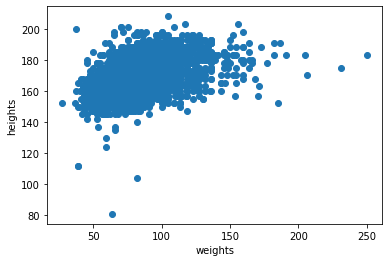

In [27]:
plt.scatter(x=df_sample.wtyrago, y=df_sample.htm3)
plt.xlabel("weights")
plt.ylabel("heights")

In [47]:
bins = np.arange(135, 210, 5)
# chon ra nhung height gan voi tung gia tri height nha. vd: 140cm -> 141, 141.5, 139.2,...
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [41]:
bins

array([135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205])

In [43]:
# height mark. this is mean of heights for each groups
heights = [group.htm3.mean() for i , group in groups]
cdfs = [util_stat.Cdf(group.wtkg2) for i, group in groups]
heights, len(heights)

([120.12459016393443,
  135.78508771929825,
  141.43396226415095,
  146.33718778908417,
  151.52843968228584,
  156.3503419942746,
  161.67421045177736,
  166.56972746679975,
  171.40954232482787,
  176.54908086026674,
  181.57596142807944,
  186.32469990536435,
  191.7859712230216,
  196.6426561620709,
  201.73827160493826,
  210.58778625954199],
 16)

True
True
True


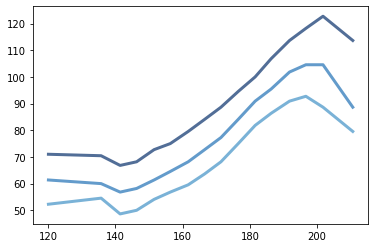

In [48]:
"""
We want to know at which weight, cdf value of a height makes up .75, .5, .25 of all samples
"""
percentiles = [75, 50, 25]
for percent in percentiles:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    print(len(weights) == 16)
    util_plot.Plot(heights, weights)

In [49]:
#Exercise: I put it in single_variable.ipynb